In [1]:
# set up environment
!git clone https://github.com/Sherif-Elfiky/CSE151AProj.git

Cloning into 'CSE151AProj'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 97 (delta 22), reused 19 (delta 6), pack-reused 0
Receiving objects: 100% (97/97), 10.54 MiB | 4.97 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# for reproducibility
np.random.seed(0)

# Data Exploration and Preprocessing

In [4]:
# read data
data = pd.read_csv('CSE151AProj/historical_data.csv')
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


**There are 197428 observations and 16 features**

In [5]:
# convert values for features created_at and actual_delivery_time from strings to datetime
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [6]:
# create new feature time_to_deliver, which represents the actual duration the order takes as a datetime (we will do regression on this)
data['time_to_deliver'] = (pd.to_datetime(data['actual_delivery_time']) - pd.to_datetime(data['created_at'])).dt.total_seconds()
data

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_to_deliver
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0


Missing data for store_primary_category. Getting NaN values. On kaggle, it says its N/A, so we need to replace the missing values in the dataframe with N/A.

In [7]:
# replace observations with store_primary_category as NaN with N/A
data.fillna({'store_primary_category': 'N/A'})

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_to_deliver
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,N/A,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,N/A,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,N/A,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0


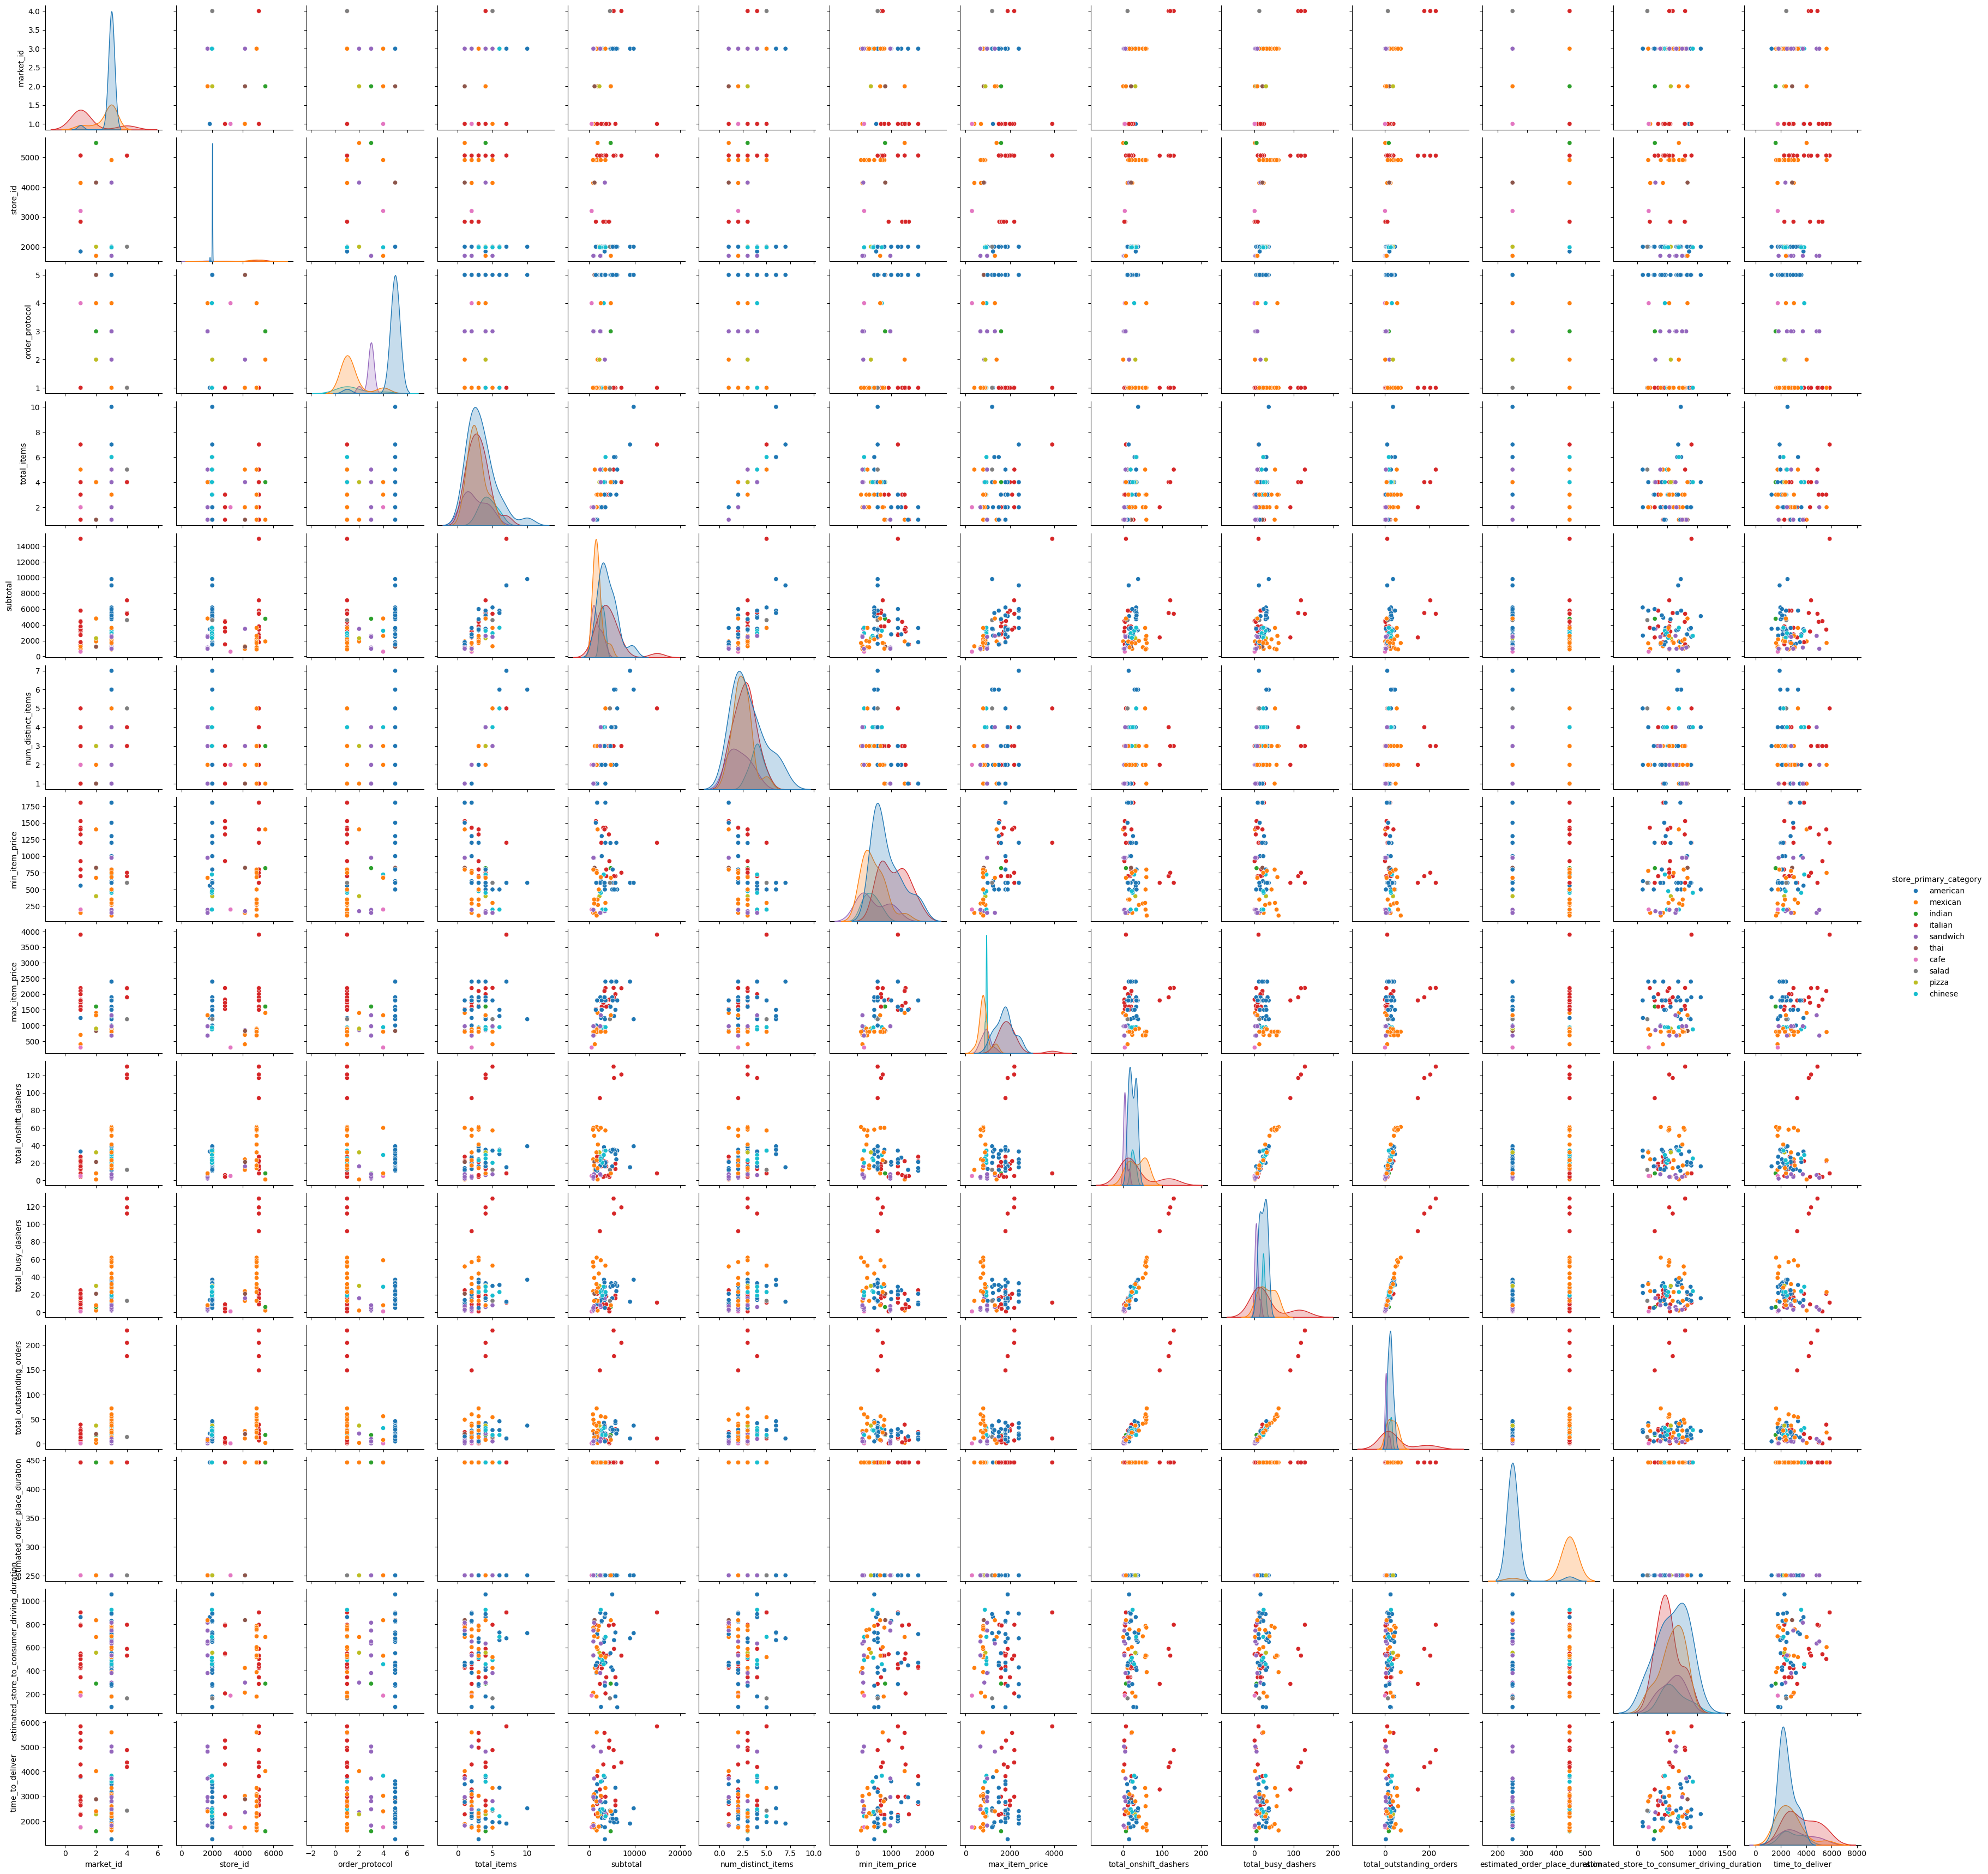

In [8]:
# let's visualize our data - only doing first 100 observations because of dataset size
sns.pairplot(data.head(100), hue = 'store_primary_category')

There are several outliers for `time_to_deliver`. Let's first get rid of those super big outliers. However, its worth to note that the rest of the data may not necessarily follow these patterns since we're only observing the first 100 observations. After a trial without taking these outliers out, we saw that these outliers were indeed for the whole dataset.

In [9]:
data = data[data['time_to_deliver'] <= 6000]

Our other features have outliers too - most of those outliers have `store_primary_category` as Italian food. Regardless of `store_primary_category`, let's drop those outliers.

In [10]:
data = data[data['total_items'] <= 8]
data = data[data['subtotal'] < 10000]
data = data[data['max_item_price'] <= 2500]
data = data[data['total_onshift_dashers'] < 90]
data = data[data['total_busy_dashers'] < 90]
data = data[data['total_outstanding_orders'] <= 100]

Let's drop our categorical features since features like `store_id` wouldn't affect the ETA. Let's also drop `created_at` and `actual_delivery_time` since we have `time_to_deliver`. `estimated_order_place_duration` is weird and is the time the restaurant takes to receive the order from DoorDash. Resembles a categorical variable, but it shouldn't affect the ETA much anyways since it happens in milliseconds.

Now that we have all our relevant numerical features, let's min-max scale our data. None of our data seemed convincingly normalized, so we won't standardize.

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# get our dropped columns
dropped_columns = ['created_at', 'actual_delivery_time', 'store_primary_category', 'market_id', 'store_id', 'order_protocol', 'estimated_order_place_duration']

# get our numerical data
numerical_data = data.drop(dropped_columns, axis=1)

# min-max numerical data
mms = MinMaxScaler()
numerical_data = pd.DataFrame(mms.fit_transform(numerical_data), columns = numerical_data.columns)
numerical_data['time_to_deliver'] = data['time_to_deliver'] # don't minmax our predictions (units should stay in seconds)
numerical_data.dropna(inplace = True)

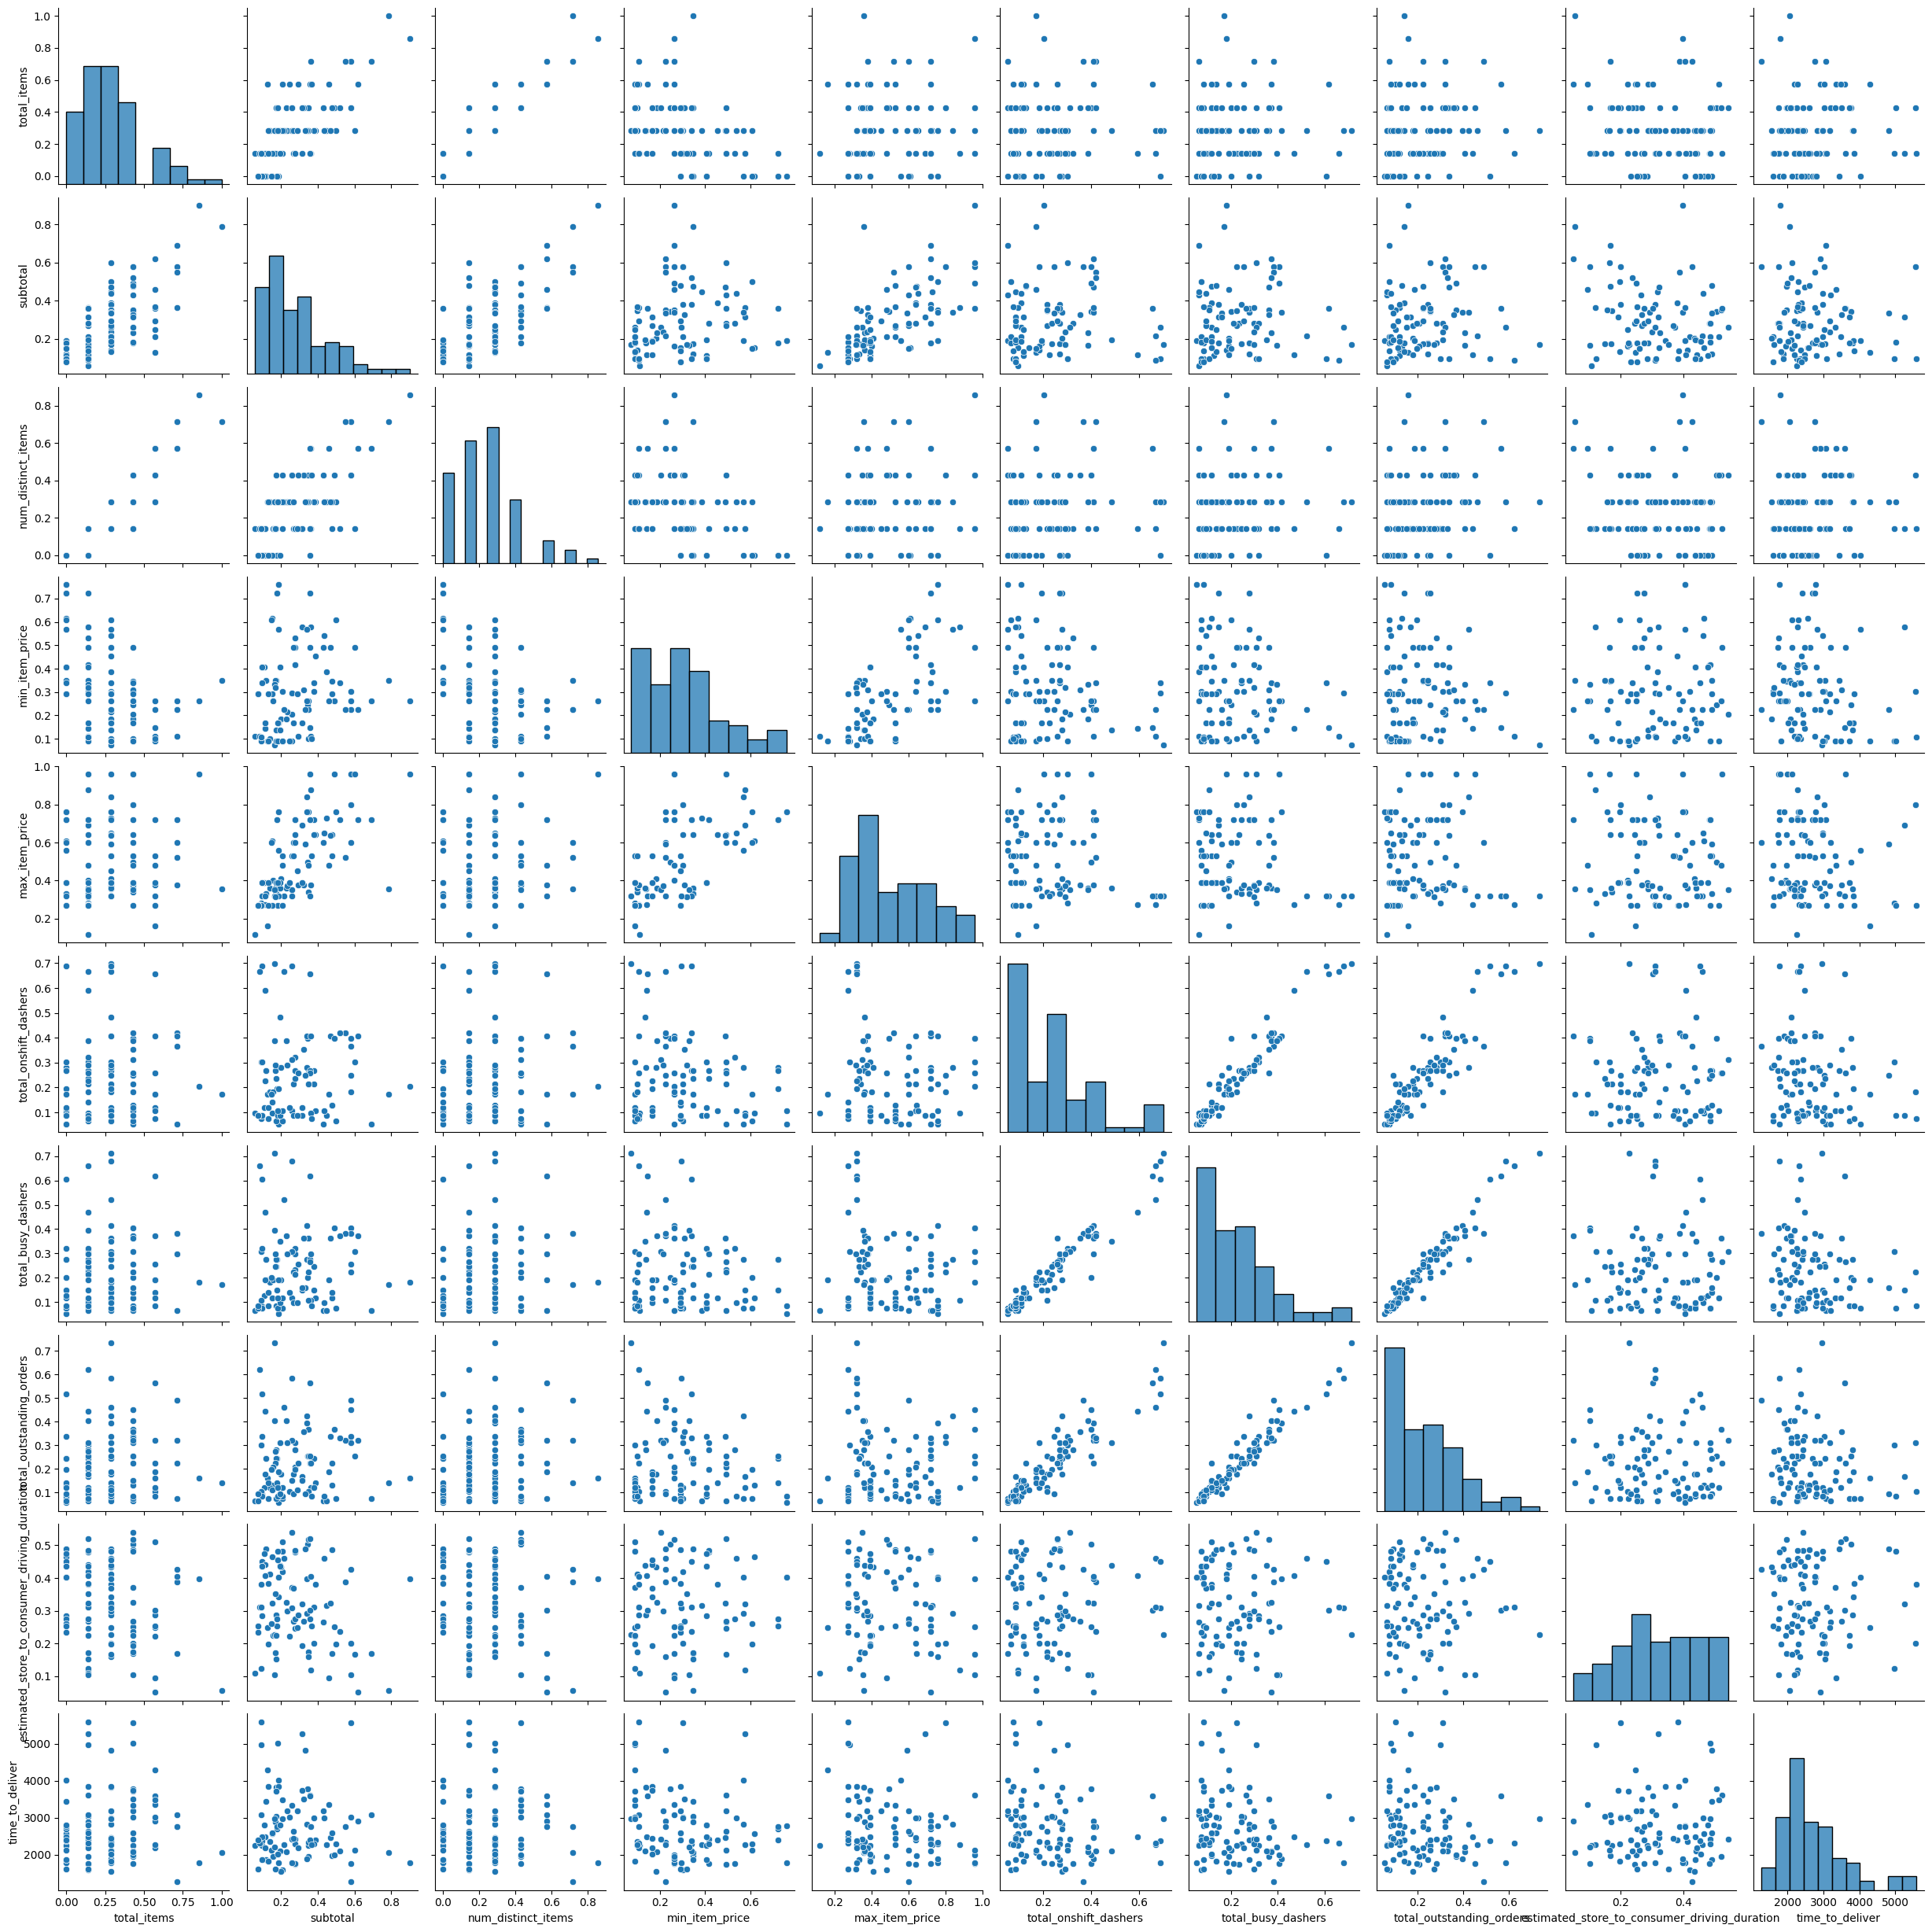

In [13]:
# let's see our data now
sns.pairplot(numerical_data.head(100))

None of the pairplots between features vs. `time_to_deliver` seem to have any clear pattern.
Let's see the correspondance between the features and `time_to_deliver`.

<Axes: >

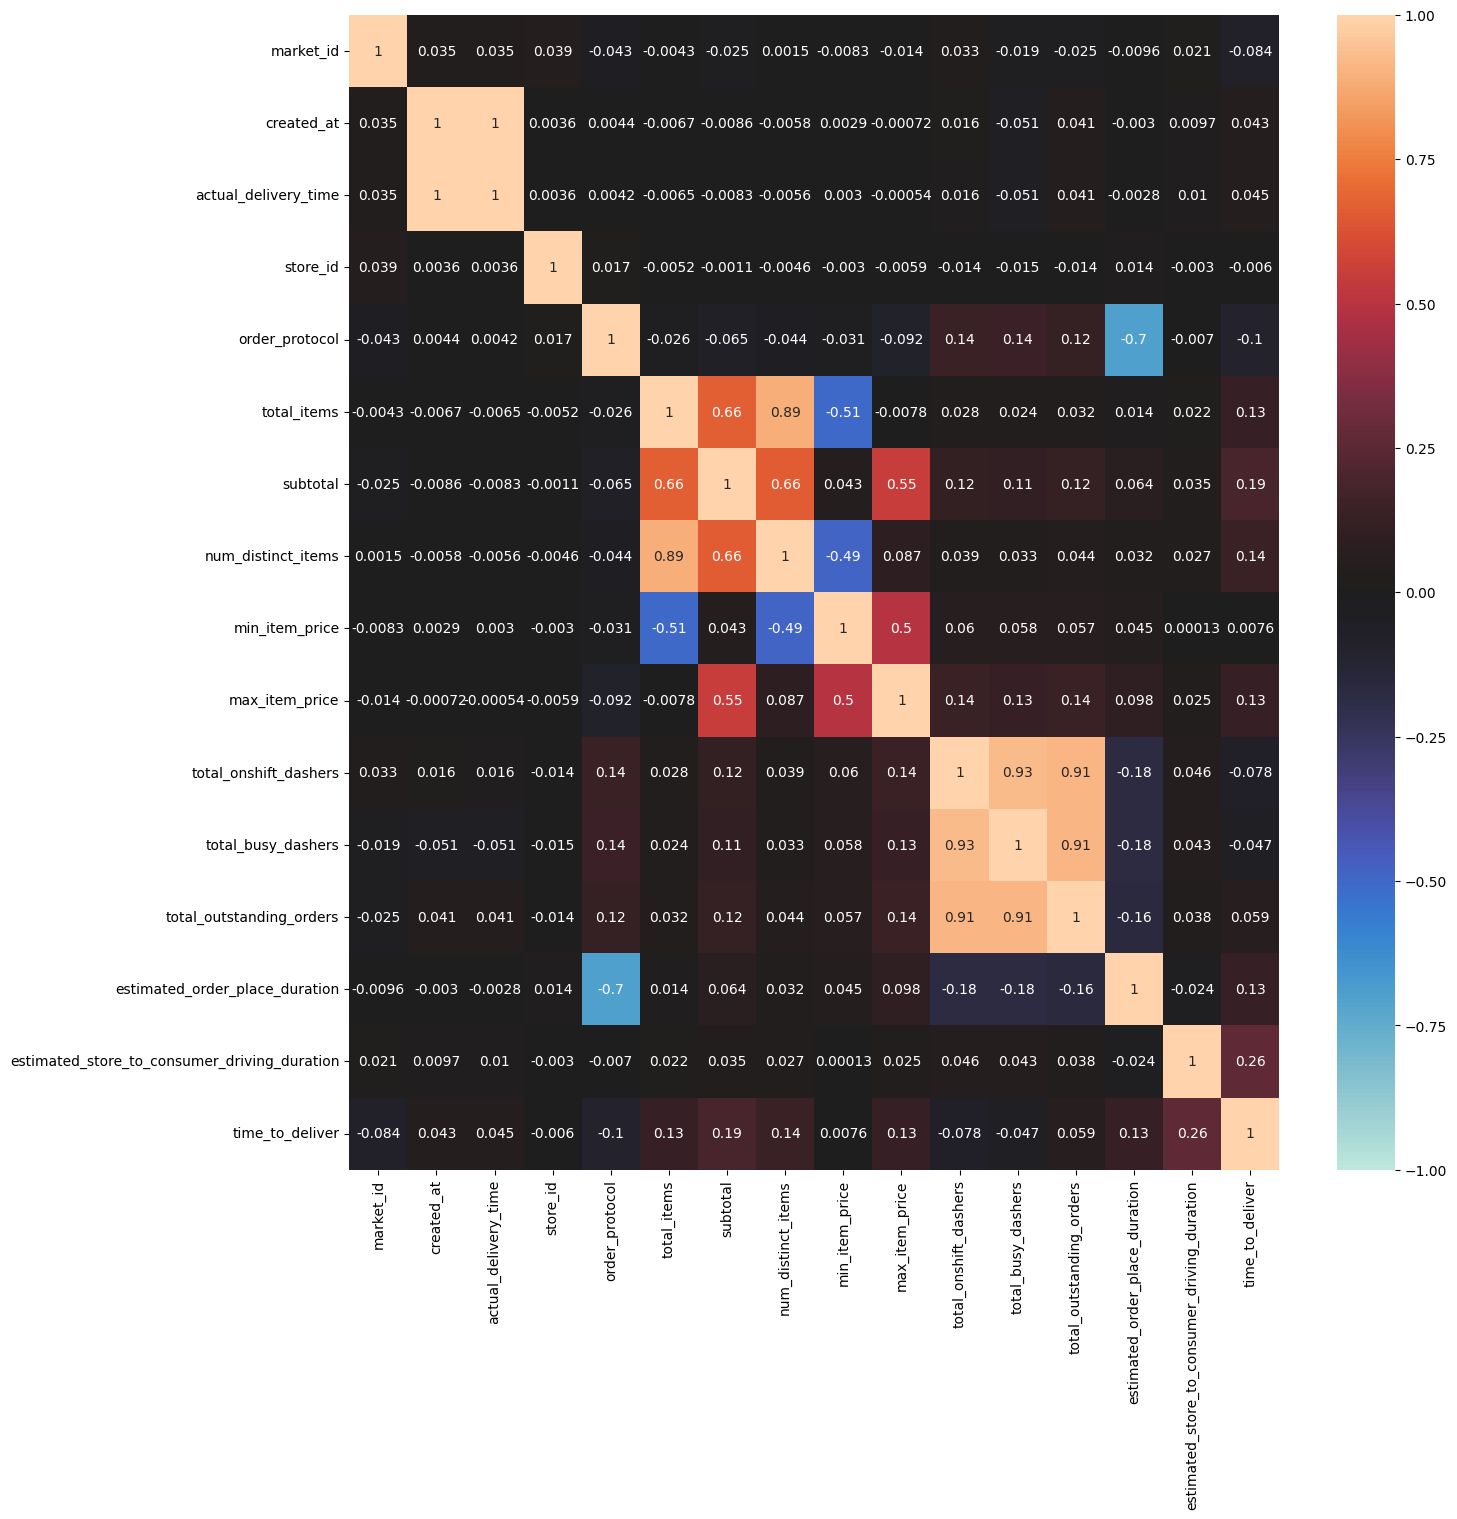

In [14]:
no_category = data.drop(['store_primary_category'], axis=1)
# find correspondance between features
corr = no_category.corr()
# plot heatmap with the correspondance values between two features
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0)

Not much correspondance between `time_to_deliver` with anything at all. However, `estimated_store_to_consumer_driving_duration` has the highest correlation. As a baseline model, let's do a linear regression using `estimated_store_to_consumer_driving_duration` to predict `time_to_deliver`

In [15]:
# we use estimated_store_to_consumer_driving_duration to predict time_to_deliver
X = numerical_data['estimated_store_to_consumer_driving_duration']

# we want to predict time_to_deliver
y = numerical_data['time_to_deliver']

In [16]:
from sklearn.model_selection import cross_val_score, train_test_split

# split train/test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

# our linear regression:
reg = LinearRegression()

# fit on training set
regmodel = reg.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

# what's our coefficient?
print('Coefficients: \n', regmodel.coef_)

Coefficients: 
 [[1.902726]]


In [18]:
# get training predictions
yhat_train = regmodel.predict(X_train.values.reshape(-1,1))
yhat_train

array([[2682.97557812],
       [2682.81989043],
       [2682.68755589],
       ...,
       [2682.53075614],
       [2682.66086657],
       [2683.15239485]])

In [19]:
# training ground truth of time_to_deliver
y_train.values.reshape(-1,1)

array([[2579.],
       [1323.],
       [ 947.],
       ...,
       [1594.],
       [3478.],
       [2619.]])

In [20]:
# testing predictions of time_to_deliver based on total_outstanding_orders
yhat_test = regmodel.predict(X_test.values.reshape(-1,1))
yhat_test

array([[2682.75316713],
       [2683.19465294],
       [2683.55384669],
       ...,
       [2682.72091754],
       [2682.7020126 ],
       [2682.6675389 ]])

In [21]:
# testing ground truth of time_to_deliver
y_test.values.reshape(-1,1)

array([[3161.],
       [3382.],
       [2569.],
       ...,
       [ 871.],
       [2733.],
       [1957.]])

In [22]:
from sklearn.metrics import mean_squared_error

# let's see our mean squared error
print('Training MSE: %.2f' % mean_squared_error(y_train, yhat_train))
print('\nTesting MSE: %.2f' % mean_squared_error(y_test, yhat_test))

Training MSE: 871983.11

Testing MSE: 863516.33


As expected, our model did really poorly here. Our testing error is actually less than our training error, which suggests that our model underfit. This makes sense because there isn't a clear pattern in the data which a linear regression could fit well.

Let's try a more complex model to see if we can do any better. We'll try a linear regression but use all the features this time to predict `time_to_deliver`.

# Linear Regression Second Attempt

In [23]:
X = numerical_data.drop(['time_to_deliver'], axis=1)
y = numerical_data['time_to_deliver']

# split train/test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
from sklearn.linear_model import LinearRegression

# our linear regression:
reg2 = LinearRegression()

# fit on training set
regmodel2 = reg2.fit(X_train, y_train)

# what's our coefficient?
print('Coefficients: \n', regmodel2.coef_)

Coefficients: 
 [-21.23001984  11.62383255  -1.72465696  -6.19776592   2.26342039
 -84.57826865  18.83925402  43.36106756  -5.46476471]


In [25]:
# get training predictions
yhat_train = regmodel2.predict(X_train)
yhat_train.reshape(-1,1)

array([[2689.60887586],
       [2676.40915952],
       [2677.35681472],
       ...,
       [2680.70109548],
       [2691.53384345],
       [2696.510322  ]])

In [26]:
# training ground truth of time_to_deliver
y_train.values.reshape(-1,1)

array([[3893.],
       [5473.],
       [5211.],
       ...,
       [3454.],
       [1186.],
       [3896.]])

In [27]:
# get testing predictions
yhat_test = regmodel2.predict(X_test)
yhat_test.reshape(-1,1)

array([[2683.35605749],
       [2692.07493326],
       [2680.65321844],
       ...,
       [2682.01692674],
       [2680.4805244 ],
       [2691.17094439]])

In [28]:
# testing ground truth of time_to_deliver
y_test.values.reshape(-1,1)

array([[2286.],
       [4180.],
       [3336.],
       ...,
       [1447.],
       [2589.],
       [2652.]])

In [29]:
# let's see our mean squared error
print('Training MSE: %.2f' % mean_squared_error(y_train, yhat_train))
print('\nTesting MSE: %.2f' % mean_squared_error(y_test, yhat_test))

Training MSE: 871735.45

Testing MSE: 864404.64


Again, our model performed better on test than train, suggesting that we underfit. Compared to the other model, we performed slightly better on train but slightly worse on test. This could be attributed to either the new model being more complex and thus underfitting less.

Neither of our models were convincing, let's try an even more complex model to see if it can decently predict `time_to_deliver`. Since we don't see any clear patterns and don't know what's going on at all, let's use a neural network to see if it can pick out anything.

# Baseline DNN

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [31]:
# baseline neural network
model = Sequential()
model.add(Dense(units = 32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'relu'))

In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
# our early stopping settings
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=1,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [34]:
history = model.fit(X_train, y_train, epochs = 10, verbose = 1, callbacks = [early_stopping])

Epoch 1/10
2194/2194 [==============================] - 5s 2ms/step - loss: 3463438.2500
Epoch 2/10
2194/2194 [==============================] - 5s 2ms/step - loss: 1002810.7500
Epoch 3/10
2194/2194 [==============================] - 7s 3ms/step - loss: 916028.3125
Epoch 4/10
2194/2194 [==============================] - 4s 2ms/step - loss: 888758.3125
Epoch 5/10
2194/2194 [==============================] - 4s 2ms/step - loss: 879416.1250
Epoch 6/10
2194/2194 [==============================] - 7s 3ms/step - loss: 875893.0625
Epoch 7/10
2194/2194 [==============================] - 6s 3ms/step - loss: 874398.8750
Epoch 8/10
2194/2194 [==============================] - 4s 2ms/step - loss: 873716.1250
Epoch 9/10
2194/2194 [==============================] - 5s 2ms/step - loss: 873246.7500
Epoch 10/10
2194/2194 [==============================] - 4s 2ms/step - loss: 872971.5000


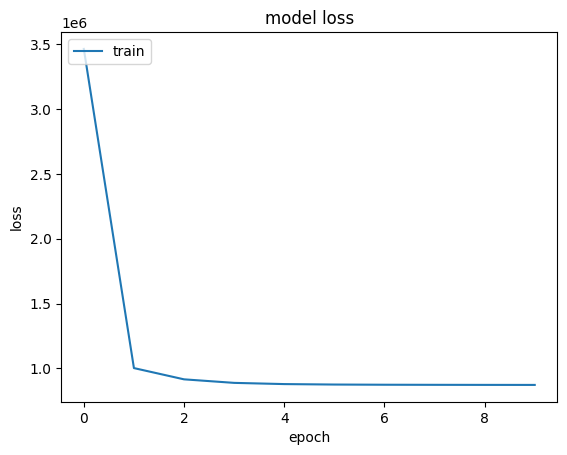

In [35]:
# plot our loss
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Seems like our loss converged fast. After three epochs or so, our loss didn't really change at all.

On the training set, our baseline neural network performed as well as our linear regression models. Let's see how our model performs on the test set.

In [36]:
model.evaluate(X_test, y_test)

549/549 [==============================] - 1s 2ms/step - loss: 865206.4375


865206.4375

Looking at our loss, we have similar results to our linear regression models in the numerical values of our loss. However, our test loss is actually greater than our train loss for this model, suggesting some overfitting. But, this could be due to randomness in our data and also maybe randomness in the optimizer finding a local optima.

In [37]:
yhat_test = model.predict(X_test)
yhat_test

549/549 [==============================] - 1s 1ms/step


array([[2649.1243],
       [2661.9895],
       [2655.3513],
       ...,
       [2627.2139],
       [2650.6213],
       [2669.4321]], dtype=float32)

In [38]:
y_test.values.reshape(-1,1)

array([[2286.],
       [4180.],
       [3336.],
       ...,
       [1447.],
       [2589.],
       [2652.]])

# DNN with Hyperparameter Tuning

Maybe our hyperparameters are bad. Let's do a gridsearch to optimize our hyperparameters to get our best model. Let's try different nodes per layer, number of hidden layers, activation functions, and learning rates.

In [39]:
def build_model(hp):
  # our hyperparameters
  units = hp.Choice('units', values = [12, 32, 64])
  hidden_layers = hp.Int('layers', min_value = 1, max_value = 3, step = 1)
  activation = hp.Choice('activation', values = ['relu', 'leaky_relu', 'elu'])
  learning_rate = hp.Float('lr', min_value = 1e-3, max_value = 1e-2, step = 3, sampling = 'log')

  model = Sequential()

  # input layer
  model.add(Dense(units = units, activation = activation, input_dim = X_train.shape[1]))

  # tune number of hidden layers
  for i in range(hidden_layers):
    model.add(Dense(units = units, activation = activation))

  # output layer
  model.add(Dense(units = 1, activation = activation))

  model.compile(optimizer = 'adam', loss = 'mean_squared_error')

  return model

In [40]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.2 MB/s eta 0:00:00


In [41]:
import keras_tuner

hp = keras_tuner.HyperParameters()

In [42]:
tuner = keras_tuner.GridSearch(
    hypermodel=build_model,
    objective='loss',
    seed=15,
    executions_per_trial=1,
    tune_new_entries=True,
    allow_new_entries=True,
    max_consecutive_failed_trials=3,
    overwrite=True
)

In [43]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Choice)
{'default': 12, 'conditions': [], 'values': [12, 32, 64], 'ordered': True}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'leaky_relu', 'elu'], 'ordered': False}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': 3, 'sampling': 'log'}


In [44]:
tuner.search(X_train, y_train, epochs = 3, validation_split = 0.1, verbose = 1)

Trial 81 Complete [00h 00m 23s]
loss: 875067.8125

Best loss So Far: 873135.9375
Total elapsed time: 00h 29m 09s


In [45]:
# see our top 3 models
tuner.results_summary(num_trials = 3)

Results summary
Results in ./untitled_project
Showing 3 best trials
Objective(name="loss", direction="min")

Trial 0053 summary
Hyperparameters:
units: 32
layers: 3
activation: elu
lr: 0.009000000000000001
Score: 873135.9375

Trial 0063 summary
Hyperparameters:
units: 64
layers: 2
activation: relu
lr: 0.001
Score: 873173.5

Trial 0071 summary
Hyperparameters:
units: 64
layers: 2
activation: elu
lr: 0.009000000000000001
Score: 873274.8125


Our best model has 32 nodes per layer, 3+1=4 hidden layers, elu as the activation, and a learning rate of 0.009

In [53]:
best_model = Sequential()
best_model.add(Dense(units = 32, activation = 'elu', input_dim = X_train.shape[1]))
best_model.add(Dense(units = 32, activation = 'elu'))
best_model.add(Dense(units = 32, activation = 'elu'))
best_model.add(Dense(units = 32, activation = 'elu'))
best_model.add(Dense(units = 1, activation = 'elu'))
best_model.learning_rate = 0.009

In [54]:
best_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [55]:
best_history = best_model.fit(X_train, y_train, epochs = 10, verbose = 1, callbacks = [early_stopping])

Epoch 1/10
2194/2194 [==============================] - 17s 7ms/step - loss: 1391516.0000
Epoch 2/10
2194/2194 [==============================] - 13s 6ms/step - loss: 879407.1250
Epoch 3/10
2194/2194 [==============================] - 5s 2ms/step - loss: 875330.9375
Epoch 4/10
2194/2194 [==============================] - 7s 3ms/step - loss: 874432.1875
Epoch 5/10
2194/2194 [==============================] - 5s 2ms/step - loss: 874171.3125
Epoch 6/10
2194/2194 [==============================] - 6s 3ms/step - loss: 874147.3750
Epoch 7/10
2194/2194 [==============================] - 6s 3ms/step - loss: 874235.1250


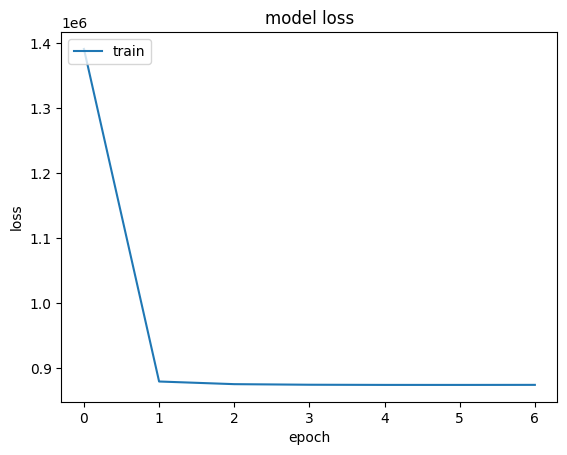

In [56]:
# plot our "best model" loss
plt.plot(best_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [57]:
best_model.evaluate(X_test, y_test)

549/549 [==============================] - 1s 2ms/step - loss: 865334.6875


865334.6875

In [58]:
yhat_test = best_model.predict(X_test)
yhat_test

549/549 [==============================] - 1s 2ms/step


array([[2692.2017],
       [2704.4287],
       [2703.7275],
       ...,
       [2706.0176],
       [2709.1765],
       [2723.914 ]], dtype=float32)

In [59]:
y_test.values.reshape(-1,1)

array([[2286.],
       [4180.],
       [3336.],
       ...,
       [1447.],
       [2589.],
       [2652.]])

Again, we experience similar results. Despite hyperparameter tuning, it seems like we weren't able to get any significant change in loss compared to our baseline.

We have signs of overfitting again since our testing error is worse than our training error. Our "best model" is relatively much more complex than our baseline since it has double the nodes per layer and more hidden layers. Given how identical the results are between the two DNNs, the data must be too random or nonsensical to accurately regress `time_to_deliver` on given our resources and methods.